In [8]:
import pandas as pd
import numpy as np
from faker import Faker
import random

fake = Faker()
np.random.seed(42)

users = [fake.uuid4()[:8] for _ in range(100)]
merchants = ["Amazon", "Uber", "Netflix", "Zara", "Apple", "Starbucks", "Spotify", "Shell", "McDonalds", "IKEA"]
categories = ["Shopping", "Transport", "Entertainment", "Food", "Fuel", "Subscriptions"]
countries = ["Poland", "UK", "Germany", "France", "Spain"]
devices = ["iPhone", "Android", "MacOS","Windows"]
methods = ["Card", "ApplePay", "GooglePay", "Transfer"]
statuses = ["Completed", "Failed", "Pending"]

rows = []
for i in range(5000):
    amount = round(abs(np.random.normal(80, 60)), 2)
    country = random.choice(countries)
    balance_before = round(np.random.uniform(200, 10000), 2)
    balance_after = round(balance_before - amount, 2)
    
    rows.append({

        "user_id": random.choice(users),
        "amount": amount,
        "merchant": random.choice(merchants),
        "category": random.choice(categories),
        "country": country,
        "device_type": random.choice(devices),
        "payment_method": random.choice(methods),
        "balance_before": balance_before,
        "balance_after": balance_after,
        "is_foreign_transaction": 0 if country == "Poland" else 1,
        "transaction_status": random.choice(statuses),
        "timestamp": fake.date_time_between(start_date="-90d", end_date="now")
    })

df = pd.DataFrame(rows)
df.to_csv("transactions.csv", index=False)

df.tail(10)



,user_id,amount,merchant,category,country,device_type,payment_method,balance_before,balance_after,is_foreign_transaction,transaction_status,timestamp
4990,132e12cd,100.33,Zara,Food,UK,Windows,GooglePay,443.78,343.45,1,Completed,2025-08-11 14:18:39.595490
4991,239d56cc,72.30,Starbucks,Fuel,Poland,Android,ApplePay,3892.99,3820.69,0,Pending,2025-09-30 16:04:40.564850
4992,c44b0363,61.86,Shell,Shopping,Spain,MacOS,Transfer,2876.20,2814.34,1,Failed,2025-08-21 08:19:44.223713
4993,df814d22,111.85,Amazon,Subscriptions,Poland,MacOS,ApplePay,3165.70,3053.85,0,Failed,2025-07-25 06:39:01.792075
4994,a8da3976,12.61,Uber,Entertainment,France,MacOS,ApplePay,7322.00,7309.39,1,Completed,2025-07-28 17:21:44.719724
4995,48caada0,202.74,Netflix,Entertainment,Poland,Android,Card,8970.12,8767.38,0,Completed,2025-09-27 23:09:17.672471
4996,fd5030c7,16.55,Starbucks,Food,Spain,iPhone,Card,9340.28,9323.73,1,Completed,2025-07-31 10:20:45.017467
4997,09c1b42c,117.40,Zara,Food,Spain,MacOS,ApplePay,2792.03,2674.63,1,Completed,2025-08-15 16:56:38.577743
4998,11266a19,21.40,Zara,Transport,France,Windows,Card,1560.00,1538.60,1,Failed,2025-09-15 23:57:19.236392
4999,859dc5af,89.62,Amazon,Subscriptions,Spain,MacOS,Card,3140.30,3050.68,1,Failed,2025-08-07 09:59:57.916818


In [7]:
import sqlite3

# połączenie z bazą (utworzy plik transactions.db)
conn = sqlite3.connect("transactions.db")

# zapis DataFrame do tabeli SQL
df.to_sql("transactions", conn, if_exists="replace", index=False)




5000

In [11]:
query="""select merchant,sum(amount) from transactions
where transaction_status='Completed'
group by merchant
order by sum(amount)

limit 20;
"""
df_query = pd.read_sql_query(query, conn)
df_query


,merchant,sum(amount)
0,Netflix,12707.32
1,Zara,13153.72
2,IKEA,13729.28
3,Spotify,14186.81
4,Starbucks,14286.85
5,Amazon,14323.23
6,Uber,14701.44
7,McDonalds,14780.75
8,Shell,15149.10
9,Apple,16916.83


In [16]:
srednia="""select country, avg(amount) as average, count(*)
from transactions
where transaction_status='Completed'
group by country
order by average;
"""
essa=pd.read_sql_query(srednia,conn)
essa

,country,average,count(*)
0,Germany,83.368293,328
1,UK,84.408708,356
2,France,84.525246,366
3,Poland,85.119122,296
4,Spain,89.439794,340


In [18]:
paymentmetod="""select payment_method, count(*) as amount_of_transactions
from transactions
group by payment_method
order by amount_of_transactions desc;
"""
result=pd.read_sql_query(paymentmetod,conn)
result

,payment_method,amount_of_transactions
0,GooglePay,1281
1,Card,1266
2,Transfer,1248
3,ApplePay,1205


In [40]:
highday="""select date((timestamp)) as day,sum(amount) as suma
from transactions
group by day
order by suma desc limit 10;"""
wynik=pd.read_sql_query(highday,conn)
wynik

,day,suma
0,2025-08-19,6564.75
1,2025-09-01,6297.76
2,2025-07-19,6284.62
3,2025-07-20,6282.39
4,2025-07-26,6221.16
5,2025-07-18,6072.22
6,2025-09-20,6056.68
7,2025-08-24,5691.49
8,2025-09-07,5676.81
9,2025-07-21,5653.21


In [42]:
sigma="""SELECT user_id, COUNT(DISTINCT payment_method) AS elo
FROM transactions
GROUP BY user_id
HAVING elo > 1
order by elo asc"""
es=pd.read_sql_query(sigma,conn)
es


,user_id,elo
0,02d7c7be,4
1,045d40e8,4
2,0876a9f2,4
3,0d4b284a,4
4,0f091ae4,4
...,...,...
95,f1dd1072,4
96,f328f221,4
97,f3a45177,4
98,f656070c,4


In [50]:
sigma="""WITH country_totals AS (
    SELECT 
        country,
        user_id,
        SUM(amount) AS total_spent
    FROM transactions
    GROUP BY country, user_id
)
SELECT 
    country,
    user_id,
    total_spent
FROM country_totals
where (country,total_spent) in
(
    select country,max(total_spent)
    from country_totals
    group by country
    )
    """
es=pd.read_sql_query(sigma,conn)
es

,country,user_id,total_spent
0,France,19ac39ae,2024.72
1,Germany,a87b7417,2772.18
2,Poland,9f998572,1682.01
3,Spain,65a547b1,1816.82
4,UK,ab6b7288,1610.33


In [54]:
sigma="""select country,category, count(*)
from transactions 
where transaction_status='Completed'
group by country,category
ORDER BY country, COUNT(*) DESC;

    """
es=pd.read_sql_query(sigma,conn)
es

,country,category,count(*)
0,France,Transport,70
1,France,Subscriptions,70
2,France,Food,62
3,France,Entertainment,62
4,France,Shopping,60
5,France,Fuel,42
6,Germany,Transport,59
7,Germany,Subscriptions,59
8,Germany,Entertainment,54
9,Germany,Fuel,53


In [60]:
sigma="""SELECT user_id
case when date(timestamp) between '2025-09-13' and '2025-10-13' then 
FROM transactions;

    """
es=pd.read_sql_query(sigma,conn)
es

,thirty_days_ago
0,2025-09-13


In [61]:
sigma="""SELECT max(date(timestamp))
FROM transactions;

    """
es=pd.read_sql_query(sigma,conn)
es

,max(date(timestamp))
0,2025-10-13


In [71]:
sigma="""WITH avg_values AS (
    SELECT 
        user_id,
        AVG(CASE WHEN DATE(timestamp) BETWEEN DATE('2025-09-13') AND DATE('2025-10-13') THEN amount END) AS new_avg,
        AVG(CASE WHEN DATE(timestamp) BETWEEN DATE('2025-08-13') AND DATE('2025-09-13') THEN amount END) AS old_avg
    FROM transactions
    GROUP BY user_id
)
SELECT 
    user_id,
    new_avg,
    old_avg,
    CASE 
        WHEN new_avg >= old_avg THEN ROUND((new_avg * 100.0 / old_avg)-100, 2)
        ELSE ROUND((old_avg * 100.0 / new_avg)-100, 2)
    END AS wzrost
FROM avg_values
order by wzrost desc
limit 10;
    """

es=pd.read_sql_query(sigma,conn)
es


,user_id,new_avg,old_avg,wzrost
0,4066023a,48.145833,94.840000,96.98
1,951d07ab,111.313684,63.002667,76.68
2,67402dc6,84.186923,135.656250,61.14
3,4924a7e4,59.996364,95.225333,58.72
4,9eef2180,91.852632,58.542308,56.90
5,0876a9f2,68.981538,103.978095,50.73
6,6a1339cb,121.182143,81.249091,49.15
7,539bde5c,67.328750,99.028125,47.08
8,d8ee611b,80.912308,117.802308,45.59
9,2d963dbf,70.915000,100.292727,41.43


In [101]:
print("""For each country, we calculate the share of the category with the highest number of completed transactions 
in relation to all transactions 
from that country (e.g. the “Food” category = 35% of all transactions in Spain""")
sigma="""WITH country_category_counts AS (
    SELECT 
        country,
        category,
        COUNT(*) AS num_transactions
    FROM transactions
    WHERE transaction_status = 'Completed'
    GROUP BY country, category
),
country_totals AS (
    SELECT 
        country,
        SUM(num_transactions) AS total_transactions
    FROM country_category_counts
    GROUP BY country
)
SELECT 
    c.country,
    c.category,
    c.num_transactions,
    t.total_transactions,
    ROUND(100.0 * c.num_transactions / t.total_transactions, 2) AS percent_share,
    RANK() OVER (PARTITION BY c.country ORDER BY ROUND(100.0 * c.num_transactions / t.total_transactions, 2) DESC) AS rnk
FROM country_category_counts c
JOIN country_totals t USING (country)
ORDER BY c.country, rnk;

"""
es=pd.read_sql_query(sigma,conn)
es

For each country, we calculate the share of the category with the highest number of completed transactions 
in relation to all transactions 
from that country (e.g. the “Food” category = 35% of all transactions in Spain


,country,category,num_transactions,total_transactions,percent_share,rnk
0,France,Subscriptions,70,366,19.13,1
1,France,Transport,70,366,19.13,1
2,France,Entertainment,62,366,16.94,3
3,France,Food,62,366,16.94,3
4,France,Shopping,60,366,16.39,5
5,France,Fuel,42,366,11.48,6
6,Germany,Subscriptions,59,328,17.99,1
7,Germany,Transport,59,328,17.99,1
8,Germany,Entertainment,54,328,16.46,3
9,Germany,Food,53,328,16.16,4


In [106]:
print("""We are looking for users who have at least one completed transaction of an amount greater
than 3× their own average transaction amount""")
hej="""with srednia as (
select user_id,avg(amount) as average
from transactions 
where transaction_status = 'Completed'
group by user_id
)
select t.user_id,s.average,t.amount
from transactions t
join srednia s
on s.user_id=t.user_id
where t.amount>3*s.average and
t.transaction_status = 'Completed'
"""
wynik=pd.read_sql_query(hej,conn)
wynik

We are looking for users who have at least one completed transaction of an amount greater
than 3× their own average transaction amount


,user_id,average,amount
0,35df458b,60.778333,188.37
1,6c69c33b,54.482000,171.61


In [107]:
import pandas as pd
import sqlite3

conn = sqlite3.connect("transactions.db")

df = pd.read_sql_query("SELECT * FROM transactions;", conn)
conn.close()

df.head()


,user_id,amount,merchant,category,country,device_type,payment_method,balance_before,balance_after,is_foreign_transaction,transaction_status,timestamp
0,539bde5c,109.80,Uber,Subscriptions,France,iPhone,ApplePay,7373.54,7263.74,1,Failed,2025-09-11 03:25:03.612746
1,f1dd1072,71.70,Netflix,Fuel,UK,iPhone,ApplePay,6066.85,5995.15,1,Failed,2025-10-03 17:55:48.349312
2,958b6178,65.95,Starbucks,Food,Spain,MacOS,ApplePay,769.22,703.27,1,Completed,2025-09-18 03:12:45.505598
3,616b8c51,65.95,Amazon,Entertainment,Germany,Android,Card,8688.53,8622.58,1,Completed,2025-08-07 11:31:30.254992
4,80f7d5dc,174.75,Zara,Fuel,Spain,iPhone,Transfer,401.73,226.98,1,Pending,2025-08-14 12:40:44.362590


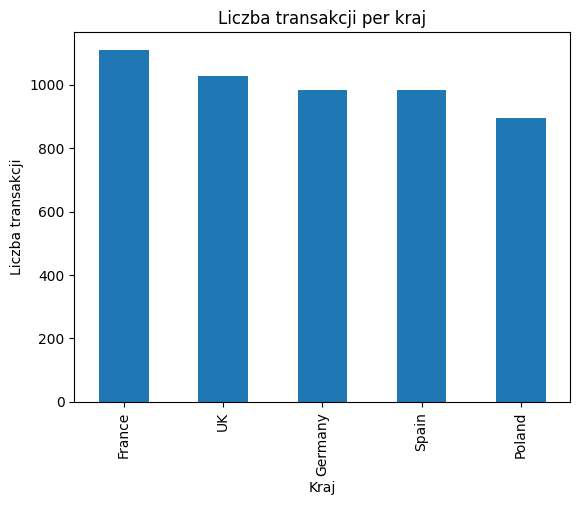

In [108]:
import matplotlib.pyplot as plt

df['country'].value_counts().plot(kind='bar', title='Liczba transakcji per kraj')
plt.xlabel('Kraj')
plt.ylabel('Liczba transakcji')
plt.show()


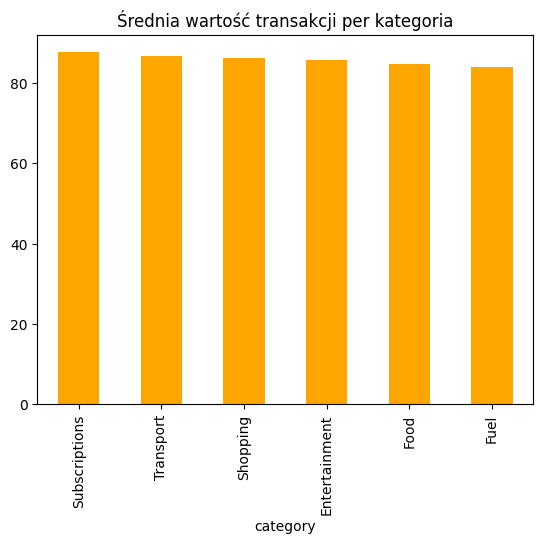

In [109]:
df.groupby('category')['amount'].mean().sort_values(ascending=False).plot(kind='bar', color='orange', title='Średnia wartość transakcji per kategoria')
plt.show()


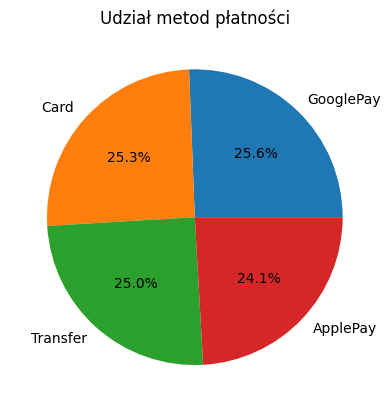

In [110]:
df['payment_method'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%', title='Udział metod płatności')
plt.ylabel('')
plt.show()


In [114]:
df_completed = df[df['transaction_status'] == 'Completed'].copy()

df_completed['avg_user_amount'] = df_completed.groupby('user_id')['amount'].transform('mean')
df_completed['anomaly_flag'] = (df_completed['amount'] > 3 * df_completed['avg_user_amount']).astype(int)

anomalies = df_completed[df_completed['anomaly_flag'] == 1]
anomalies[['user_id', 'amount', 'avg_user_amount']].head()




,user_id,amount,avg_user_amount
3921,35df458b,188.37,60.778333
4422,6c69c33b,171.61,54.482000
